In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm

%matplotlib inline

In [2]:
df_asurance = pd.read_csv('insurance.csv')


In [3]:
smoker_dmy = pd.get_dummies(df_asurance['smoker'], prefix="smoker_dmy")

In [4]:
df_asurance = pd.concat([df_asurance,smoker_dmy],axis=1)
df_asurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_dmy_no,smoker_dmy_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [5]:
as_feature_cols = ['age','bmi','children','smoker_dmy_yes','smoker_dmy_no']
X = df_asurance[as_feature_cols]
y = df_asurance['charges']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

TRAIN MODEL

In [8]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [9]:
print(model.intercept_)
print(model.coef_)

0.0
[   248.58309341    346.24787637    514.50422997  10966.97225862
 -12747.58882968]


MODEL INFERENCE

In [11]:
# y_pred stands for 'y prediction' because we want to predict y value
y_pred = model.predict(X_test)

In [12]:
gap = y_test - y_pred

<AxesSubplot:>

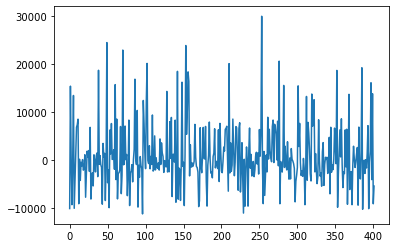

In [13]:
gap.reset_index(drop=True).plot()

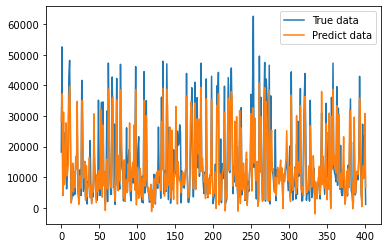

In [17]:
fig,ax = plt.subplots() #make canvas plot

plt.rcParams['agg.path.chunksize'] = 10000
y_test_reset = y_test.reset_index(drop=True)

ax.plot(y_test_reset.index.values, y_test, label='True data')
ax.plot(y_test_reset.index.values, y_pred, label='Predict data')
plt.legend()